In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
description = pd.read_csv("Data/steam_description_data.csv")
media = pd.read_csv("Data/steam_media_data.csv")
requirements = pd.read_csv("Data/steam_requirements_data.csv")
support = pd.read_csv("Data/steam_support_info.csv")
steam = pd.read_csv("Data/steam.csv")
tag = pd.read_csv("Data/steamspy_tag_data.csv")

In [3]:
None

In [4]:
import scipy.cluster.hierarchy as sch
import scipy

In [5]:
games = steam[:20]
games

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


In [6]:
unique_genres = set()
for row in steam["categories"].values:
    g = row.replace("'", "")
    g = g.split(";")
    for genre in g:
     unique_genres.add(genre)

for i, a in enumerate(unique_genres):
    print("'",a,"':",i,",",sep="")

'Steam Trading Cards':0,
'MMO':1,
'Shared/Split Screen':2,
'Online Co-op':3,
'Valve Anti-Cheat enabled':4,
'Mods':5,
'Local Multi-Player':6,
'Mods (require HL2)':7,
'Steam Cloud':8,
'In-App Purchases':9,
'Co-op':10,
'Full controller support':11,
'Cross-Platform Multiplayer':12,
'Includes level editor':13,
'Steam Leaderboards':14,
'Steam Turn Notifications':15,
'Commentary available':16,
'Includes Source SDK':17,
'Stats':18,
'Captions available':19,
'Local Co-op':20,
'SteamVR Collectibles':21,
'Multi-player':22,
'Online Multi-Player':23,
'Steam Achievements':24,
'Steam Workshop':25,
'Single-player':26,
'VR Support':27,
'Partial Controller Support':28,


In [7]:
genres_index = {'Accounting': 0,
 'Action': 1,
 'Adventure':2,
 'Animation & Modeling':3,
 'Audio Production':4,
 'Casual':5,
 'Design & Illustration':6,
 'Documentary':7,
 'Early Access':8,
 'Education':9,
 'Free to Play':10,
 'Game Development':11,
 'Gore':12,
 'Indie':13,
 'Massively Multiplayer':14,
 'Nudity':15,
 'Photo Editing':16,
 'RPG':17,
 'Racing':18,
 'Sexual Content':19,
 'Simulation':20,
 'Software Training':21,
 'Sports':22,
 'Strategy':23,
 'Tutorial':24,
 'Utilities':25,
 'Video Production':26,
 'Violent':27,
 'Web Publishing':28}

platforms_index = {'linux': 0, 'mac': 1, 'windows': 2}

categories_index = {
    'Single-player':0,
'Local Co-op':1,
'Partial Controller Support':2,
'Co-op':3,
'Steam Turn Notifications':4,
'Shared/Split Screen':5,
'Cross-Platform Multiplayer':6,
'VR Support':7,
'Steam Trading Cards':8,
'Includes level editor':9,
'Online Multi-Player':10,
'Commentary available':11,
'Steam Leaderboards':12,
'SteamVR Collectibles':13,
'Steam Achievements':14,
'Mods (require HL2)':15,
'MMO':16,
'Steam Cloud':17,
'Local Multi-Player':18,
'Valve Anti-Cheat enabled':19,
'Captions available':20,
'Steam Workshop':21,
'Includes Source SDK':22,
'Multi-player':23,
'Full controller support':24,
'Online Co-op':25,
'Mods':26,
'Stats':27,
'In-App Purchases':28
}

tags_index = {
    'Cute':0,
'Great Soundtrack':1,
'Dragons':2,
'Psychological':3,
'FPS':4,
'Bullet Time':5,
'City Builder':6,
'Video Production':7,
'Mini Golf':8,
'Stealth':9,
'Web Publishing':10,
'Dark Humor':11,
'Western':12,
'Quick-Time Events':13,
'Open World':14,
'Crime':15,
'Character Action Game':16,
'JRPG':17,
'Sokoban':18,
'Tower Defense':19,
'Classic':20,
'Sailing':21,
'Turn-Based Strategy':22,
'RTS':23,
'Dark Fantasy':24,
'Spectacle fighter':25,
'Time Attack':26,
'Swordplay':27,
'Intentionally Awkward Controls':28,
'God Game':29,
'Bowling':30,
'Loot':31,
'4X':32,
'Conversation':33,
'Bikes':34,
'Skateboarding':35,
'Walking Simulator':36,
'VR Only':37,
'Cats':38,
'Parody ':39,
'Cold War':40,
'Dungeon Crawler':41,
'Free to Play':42,
'Pinball':43,
'Strategy RPG':44,
'Fast-Paced':45,
'Mouse only':46,
'Arena Shooter':47,
'Destruction':48,
'Linear':49,
'Dating Sim':50,
'Hunting':51,
'Lemmings':52,
'Underwater':53,
'Violent':54,
'Strategy':55,
'Ninja':56,
'Crafting':57,
'Multiple Endings':58,
'Stylized':59,
'Third Person':60,
'Horses':61,
'Short':62,
'Gun Customization':63,
'Wargame':64,
'Hidden Object':65,
'Competitive':66,
'Choices Matter':67,
'Faith':68,
'Snowboarding':69,
'Gothic':70,
'Choose Your Own Adventure':71,
'Minimalist':72,
'Action-Adventure':73,
'Co-op':74,
'Utilities':75,
'Comic Book':76,
'Driving':77,
'Golf':78,
'Batman':79,
'Political':80,
'Science':81,
'Pool':82,
'1990s':83,
'Blood':84,
'Casual':85,
'Philisophical':86,
'Thriller':87,
'Action':88,
'Nonlinear':89,
'Fantasy':90,
'Controller':91,
'VR':92,
'Kickstarter':93,
'Cartoony':94,
'Villain Protagonist':95,
'Text-Based':96,
'Dinosaurs':97,
'Hacking':98,
'Time Management':99,
'Difficult':100,
'Atmospheric':101,
'RPG':102,
'Design & Illustration':103,
'Family Friendly':104,
'Space':105,
'Soccer':106,
'Abstract':107,
'Parkour':108,
'Alternate History':109,
'2.5D':110,
'Trains':111,
'Skating':112,
'Futuristic':113,
'Offroad':114,
'Sandbox':115,
'Werewolves':116,
'Lovecraftian':117,
'2D':118,
'Motorbike':119,
'Card Game':120,
'Cartoon':121,
'Cinematic':122,
'Demons':123,
'Real Time Tactics':124,
'Hex Grid':125,
'Politics':126,
'Shooter':127,
'Time Travel':128,
'Isometric':129,
'NSFW':130,
'Comedy':131,
'FMV':132,
'Beautiful':133,
'Moddable':134,
'LEGO':135,
'Story Rich':136,
'Detective':137,
'Clicker':138,
'Grid-Based Movement':139,
'Satire':140,
'Gore':141,
'Turn-Based Tactics':142,
'Cycling':143,
'Procedural Generation':144,
'Voxel':145,
'Star Wars':146,
'Time Manipulation':147,
'e-sports':148,
'War':149,
'Grand Strategy':150,
'Colorful':151,
'Horror':152,
'PvP':153,
'Animation & Modeling':154,
'MOBA':155,
'Sniper':156,
'Dystopian ':157,
'Naval':158,
'Experimental':159,
'Psychedelic':160,
'Sci-fi':161,
'Zombies':162,
'Photo Editing':163,
'Mystery':164,
'Vampire':165,
'Building':166,
'Narration':167,
'Old School':168,
'Snow':169,
'GameMaker':170,
'Gambling':171,
'Perma Death':172,
'Indie':173,
'Steampunk':174,
'Mythology':175,
'Investigation':176,
'Adventure':177,
'Aliens':178,
'Sports':179,
'Education':180,
'Memes':181,
'3D Vision':182,
'Real-Time':183,
'Dungeons & Dragons':184,
'Word Game':185,
'Logic':186,
'Military':187,
'Cyberpunk':188,
'On-Rails Shooter':189,
'Game Development':190,
'Diplomacy':191,
'Noir':192,
'Souls-like':193,
'Otome':194,
'Music-Based Procedural Generation':195,
'Survival Horror':196,
'Racing':197,
'4 Player Local':198,
'Music':199,
'Match 3':200,
'Baseball':201,
'Flight':202,
'Surreal':203,
'Turn-Based':204,
'Wrestling':205,
'Epic':206,
'Post-apocalyptic':207,
'Online Co-Op':208,
'3D Platformer':209,
'Software':210,
'Score Attack':211,
'Football':212,
'Dog':213,
'Documentary':214,
'Funny':215,
'Dark':216,
'Hockey':217,
'Team-Based':218,
'Typing':219,
'Movie':220,
'Beat em up':221,
'Rome':222,
'Interactive Fiction':223,
'Assassin':224,
'World War I':225,
'Medieval':226,
'Fighting':227,
'Turn-Based Combat':228,
'Pirates':229,
'Psychological Horror':230,
'Character Customization':231,
'Action RPG':232,
'Platformer':233,
'Real-Time with Pause':234,
'Hack and Slash':235,
'MMORPG':236,
'Mod':237,
'1980s':238,
'Anime':239,
'Programming':240,
'Remake':241,
'Runner':242,
'Romance':243,
'Mars':244,
'Robots':245,
'Metroidvania':246,
'Space Sim':247,
'3D':248,
'Level Editor':249,
'Side Scroller':250,
'Heist':251,
'Multiplayer':252,
'Physics':253,
'First-Person':254,
'Basketball':255,
'Cult Classic':256,
'Survival':257,
'360 Video':258,
'Board Game':259,
'Visual Novel':260,
'Sexual Content':261,
'Singleplayer':262,
'Puzzle':263,
'Martial Arts':264,
'Spelling':265,
'Exploration':266,
'Split Screen':267,
'Relaxing':268,
'Realistic':269,
'Pixel Graphics':270,
'Tanks':271,
'World War II':272,
'Party-Based RPG':273,
'Retro':274,
'Shoot Em Up':275,
'Rogue-lite':276,
'Twin Stick Shooter':277,
'Tennis':278,
'Agriculture':279,
'Local Co-Op':280,
'Trading':281,
'Rogue-like':282,
'Benchmark':283,
'America':284,
'Inventory Management':285,
'Hand-drawn':286,
'Illuminati':287,
'Touch-Friendly':288,
'Drama':289,
'Class-Based':290,
'Third-Person Shooter':291,
'Battle Royale':292,
'Resource Management':293,
'Economy':294,
'Historical':295,
'Magic':296,
'Management':297,
'Audio Production':298,
'Motocross':299,
'Mechs':300,
'BMX':301,
'Early Access':302,
'Replay Value':303,
'RPGMaker':304,
'Chess':305,
'Bullet Hell':306,
'Mining':307,
'2D Fighter':308,
'Submarine':309,
'Voice Control':310,
'Masterpiece':311,
'Mature':312,
'Software Training':313,
'Games Workshop':314,
'Capitalism':315,
'Simulation':316,
'Arcade':317,
'Nudity':318,
'Puzzle-Platformer':319,
'CRPG':320,
'Tactical RPG':321,
'Supernatural':322,
'Base-Building':323,
'Warhammer 40K':324,
'Fishing':325,
'Superhero':326,
'Point & Click':327,
'Trading Card Game':328,
'Rhythm':329,
'Massively Multiplayer':330,
'Local Multiplayer':331,
'Lara Croft':332,
'Top-Down':333,
'6DOF':334,
'Tactical':335,
'Female Protagonist':336,
'Mystery Dungeon':337,
'Top-Down Shooter':338
}

In [32]:
steam = pd.read_csv("Data/steam.csv")
steam2 = steam[(steam["owners"] == "100000000-200000000") | (steam["owners"] == "50000000-100000000") | (steam["owners"] == "20000000-50000000") | (steam["owners"] == "10000000-20000000") | (steam["owners"] == "5000000-10000000")]
#steam2 = steam[(steam["owners"] == "10000000-20000000")]

In [33]:
game_specifics = []
for platform, genre, tag, category in steam2[["platforms", "genres", "steamspy_tags", "categories"]].values:
    p = [0] * len(platforms_index)
    g = [0] * len(genres_index)
    t = [0] * len(tags_index)
    c = [0] * len(categories_index)

    platform = platform.replace("'", "")
    tmp = platform.split(";")
    for e in tmp:
        p[platforms_index[e]] = 1    
    
    genre = genre.replace("'", "")
    tmp = genre.split(";")
    for e in tmp:
        g[genres_index[e]] = 1
    
    tag = tag.replace("'", "")
    tmp = tag.split(";")
    for e in tmp:
        t[tags_index[e]] = 1

    category = category.replace("'", "")
    tmp = category.split(";")
    for e in tmp:
        c[categories_index[e]] = 1
    game_specifics.append(p+g+t+c)
    
len(game_specifics)

73

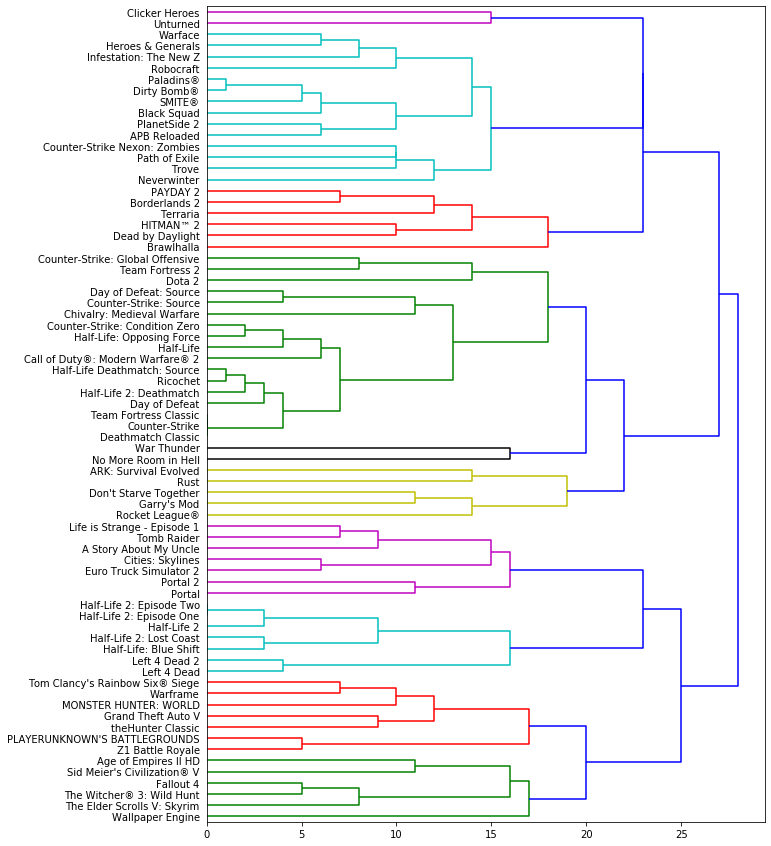

In [51]:
L = sch.linkage(game_specifics, method="complete", metric="cityblock")
plt.figure(figsize=(10, 15))
D      = sch.dendrogram(L, labels=steam2["name"].values, leaf_font_size=10, orientation='right', )
plt.show()